In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

In [ ]:
# Middle East countries
middle_east_countries = [
    "Bahrain", "Cyprus", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "Turkey",
    "United Arab Emirates", "Yemen"
]

# Fake oil reserves (in billion barrels)
# Replace these later with real data
oil_reserves = {
    "Saudi Arabia": 267,           # [1][2][3]
    "Iran": 208,                   # [2]
    "Iraq": 145,                   # [2]
    "Kuwait": 101.5,               # [2]
    "United Arab Emirates": 111,   # [2]
    "Qatar": 25.2,                 # [2]
    "Oman": 5.4,                   # [2]
    "Yemen": 3,                    # [2]
    "Egypt": 3.3,                  # [2]
    "Syria": 2.5,                  # [2]
    "Israel": 0.01,                # [2]
    "Jordan": 0.001,               # [2]
    "Bahrain": 0.124,              # [2]
    "Lebanon": 0,                  # [2]
    "Palestine": 0,                # [2]
    "Turkey": 0.3,                 # [2]
    "Cyprus": 0.01                 # [2]
}
# Load world map
world = gpd.read_file('/content/map/ne_110m_admin_0_countries.shp')

print(world.columns)

# Filter only Middle East
middle_east = world[world['ADMIN'].isin(middle_east_countries)].copy()
middle_east['oil_reserves'] = middle_east['ADMIN'].map(oil_reserves)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


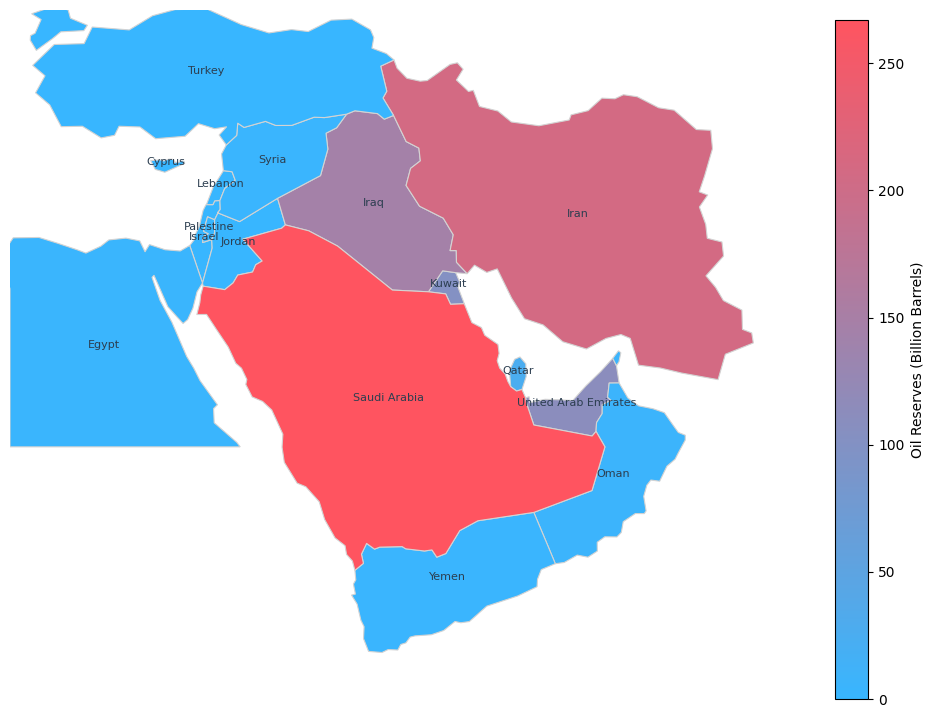

In [ ]:
# Apply modern style
rcParams['font.family'] = 'DejaVu Sans'
rcParams['axes.facecolor'] = 'white'
rcParams['figure.facecolor'] = 'white'

# Custom red-to-blue colormap
colors = ['#38b6ff', '#ff5460']  # Blue (low) to Red (high)
cmap = LinearSegmentedColormap.from_list("red_blue_custom", colors)

# Normalize values
norm = mcolors.Normalize(vmin=0, vmax=max(oil_reserves.values()))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

middle_east.plot(
    ax=ax,
    column='oil_reserves',
    cmap=cmap,
    edgecolor='lightgray',
    linewidth=0.8,
    legend=True,
    legend_kwds={
        'label': "Oil Reserves (Billion Barrels)",
        'shrink': 0.7
    }
)

# Annotate country names with drop-shadow
for idx, row in middle_east.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    ax.text(x, y, row['ADMIN'], fontsize=8, ha='center', color='#2c3e50')

# Zoom in to Middle East
ax.set_xlim(25, 65)
ax.set_ylim(10, 42)

# Clean look
ax.axis('off')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("/content/crude-oil-price.csv")

df_trade = pd.read_csv("/content/tradedeficit.csv")

df_trade.head()

,year,month,value
0,2021,Jan,-14.54
1,2021,Feb,-12.62
2,2021,Mar,-13.93
3,2021,Apr,-15.10
4,2021,May,-6.28


In [ ]:
# Assuming your dataframe is named `df` and `date` is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data from Jan 2021 onwards
df = df[df['date'] >= '2021-01-01']

# Set date as index for resampling
df.set_index('date', inplace=True)

# Resample to monthly average prices
monthly_avg = df['price'].resample('M').mean().reset_index()

# (Optional) Format the date to YYYY-MM for readability
monthly_avg['date'] = monthly_avg['date'].dt.strftime('%Y-%m')

print(monthly_avg)


       date     price
0   2021-01   52.2000
1   2021-02   61.5000
2   2021-03   59.1600
3   2021-04   63.5800
4   2021-05   66.9300
5   2021-06   73.4700
6   2021-07   73.9500
7   2021-08   68.5000
8   2021-09   75.0300
9   2021-10   81.7800
10  2021-11   65.8500
11  2021-12   74.8800
12  2022-01   86.4900
13  2022-02   93.5000
14  2022-03   98.5200
15  2022-04  102.9400
16  2022-05  111.9100
17  2022-06  103.1000
18  2022-07   96.7500
19  2022-08   89.0300
20  2022-09   78.7200
21  2022-10   85.4000
22  2022-11   80.6600
23  2022-12   80.4500
24  2023-01   79.1700
25  2023-02   77.1900
26  2023-03   75.8000
27  2023-04   76.7800
28  2023-05   68.2400
29  2023-06   70.7800
30  2023-07   81.3200
31  2023-08   82.9600
32  2023-09   88.8000
33  2023-10   80.5000
34  2023-11   76.0500
35  2023-12   71.6500
36  2024-01   75.7100
37  2024-02   77.4500
38  2024-03   83.1235
39  2024-04   81.9300
40  2024-05   76.9900
41  2024-06   81.5400
42  2024-07   77.9100
43  2024-08   73.5500
44  2024-0

/tmp/ipython-input-4-4207899070.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['price'].resample('M').mean().reset_index()


In [ ]:
# First, prepare the monthly_avg DataFrame
monthly_avg['date'] = pd.to_datetime(monthly_avg['date'])  # convert back to datetime if formatted
monthly_avg['year'] = monthly_avg['date'].dt.year
monthly_avg['month'] = monthly_avg['date'].dt.strftime('%b')  # e.g., Jan, Feb, ...

# Now merge with df_deficit
merged_df = pd.merge(df_trade, monthly_avg, on=['year', 'month'], how='inner')

print(merged_df)

    year month  value       date     price
0   2021   Jan -14.54 2021-01-01   52.2000
1   2021   Feb -12.62 2021-02-01   61.5000
2   2021   Mar -13.93 2021-03-01   59.1600
3   2021   Apr -15.10 2021-04-01   63.5800
4   2021   May  -6.28 2021-05-01   66.9300
5   2021   Jun  -9.37 2021-06-01   73.4700
6   2021   Jul -11.01 2021-07-01   73.9500
7   2021   Aug -13.81 2021-08-01   68.5000
8   2021   Sep -22.59 2021-09-01   75.0300
9   2021   Oct -19.90 2021-10-01   81.7800
10  2021   Nov -22.91 2021-11-01   65.8500
11  2021   Dec -21.68 2021-12-01   74.8800
12  2022   Jan -17.87 2022-01-01   86.4900
13  2022   Feb -21.19 2022-02-01   93.5000
14  2022   Mar -18.51 2022-03-01   98.5200
15  2022   Apr -20.11 2022-04-01  102.9400
16  2022   May -24.29 2022-05-01  111.9100
17  2022   Jun -25.63 2022-06-01  103.1000
18  2022   Jul -31.02 2022-07-01   96.7500
19  2022   Aug -28.68 2022-08-01   89.0300
20  2022   Sep -25.71 2022-09-01   78.7200
21  2022   Oct -26.91 2022-10-01   85.4000
22  2022   

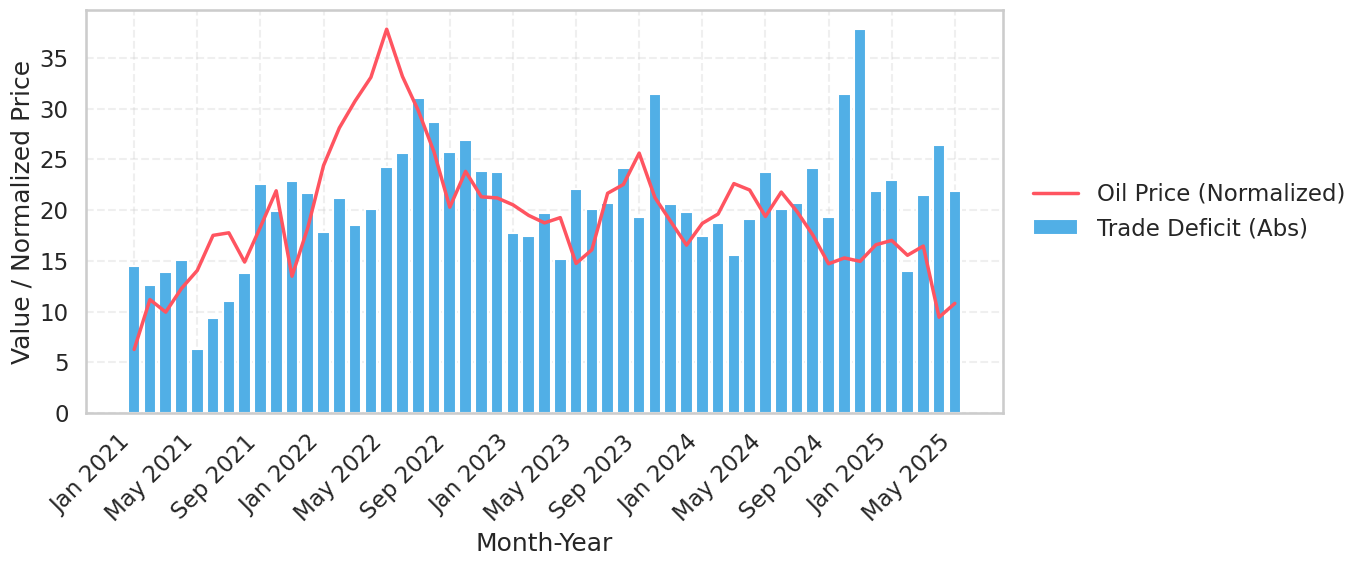

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take absolute value of deficit
merged_df['value'] = merged_df['value'].abs()

# Normalize oil price to same scale as value
price_min, price_max = merged_df['price'].min(), merged_df['price'].max()
value_min, value_max = merged_df['value'].min(), merged_df['value'].max()

merged_df['price_normalized'] = (
    (merged_df['price'] - price_min) / (price_max - price_min)
) * (value_max - value_min) + value_min

# Create combined Month-Year label
merged_df['month_year'] = merged_df['month'] + ' ' + merged_df['year'].astype(str)

# Set style
sns.set(style="whitegrid", context="talk")

# Initialize figure
plt.figure(figsize=(14, 6))

# Bar plot (trade deficit)
sns.barplot(
    data=merged_df,
    x='month_year',
    y='value',
    color='#38b6ff',
    label='Trade Deficit (Abs)',
)

# Line plot (normalized oil price) - no markers
sns.lineplot(
    data=merged_df,
    x='month_year',
    y='price_normalized',
    color='#ff5460',
    label='Oil Price (Normalized)',
    linewidth=2.5,
)

# Clean X-axis (every 4th month)
xticks = merged_df['month_year'].tolist()
plt.xticks(
    ticks=range(0, len(xticks), 4),
    labels=[xticks[i] for i in range(0, len(xticks), 4)],
    rotation=45,
    ha='right'
)

# Labels and Title
plt.xlabel('Month-Year')
plt.ylabel('Value / Normalized Price')

# Move legend outside
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False)

# Layout and aesthetics
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()
